**Question 1**

The most sensible approach for predicting the operating mode of a turbine based on the two sensor reading time series would be a sequence-to-vector approach. This is because we have two time series inputs (time_series_1 and time_series_2), and we want to predict a single output (operating mode) for each time series pair.


For this approach, we could use a combination of 1D convolutional layers (Conv1D) and recurrent layers (such as LSTM or GRU) to capture the patterns in the time series data. The final output of the model would be a dense layer with softmax activation to predict the operating mode (0, 1, 2, or 3).




**Question 2**

In [ ]:
import pandas as np
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
with open('/time_series_1.pickle', 'rb') as handle:
  time_series_1 = pickle.load(handle)

with open('/time_series_2.pickle', 'rb') as handle:
  time_series_2 = pickle.load(handle)

with open('/y.pickle', 'rb') as handle:
  y = pickle. load(handle)

In [ ]:
time_series_1

array([[30, 29, 29, ..., 36, 35, 50],
       [31, 31, 30, ..., 37, 32, 31],
       [28, 28, 28, ..., 40, 29, 38],
       ...,
       [28, 28, 28, ..., 38, 28, 36],
       [28, 28, 29, ..., 31, 36, 51],
       [31, 31, 30, ..., 35, 38, 24]], dtype=uint8)

In [ ]:
time_series_2

array([[84, 72, 93, ...,  2,  2,  1],
       [71, 83, 81, ...,  1,  1,  1],
       [78, 71, 82, ...,  0,  0,  0],
       ...,
       [83, 72, 95, ...,  0,  0,  0],
       [84, 68, 92, ...,  1,  0,  0],
       [81, 71, 98, ...,  0,  0,  0]], dtype=uint8)

In [ ]:
y

array([1., 2., 3., ..., 3., 3., 1.])

In [ ]:

# Combine time series data
X = np.stack((time_series_1, time_series_2), axis=-1)

# Convert y to one-hot encoding
y = tf.keras.utils.to_categorical(y, num_classes=4)


In [ ]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

In [ ]:
# Define batch size and shuffle buffer size
batch_size = 32
shuffle_buffer_size = len(y_train)

In [ ]:
# Create a TensorFlow dataset from the train set
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_dataset = train_dataset.shuffle(shuffle_buffer_size).batch(batch_size)

# Create a TensorFlow dataset from the test set
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
test_dataset = test_dataset.batch(batch_size)

## **Baseline Model**

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32, kernel_size=5, activation='relu', input_shape=(5000, 2)),
    tf.keras.layers.SimpleRNN(units=64, dropout=0.2, recurrent_dropout=0.2, return_sequences=True),
    tf.keras.layers.GRU(units=64, dropout=0.2, recurrent_dropout=0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# For creating the checkpoint for out model so that we can save the optimal model.
filepath="/content/drive/MyDrive/workspace/sarthak/baseline_model.hdf5"

checkpoint = ModelCheckpoint(filepath=filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

callbacks_list = [checkpoint]

In [ ]:
history = model.fit(train_dataset, epochs=10, validation_data=test_dataset, verbose=1, callbacks=callbacks_list)

Epoch 1/10
100/100 [==============================] - ETA: 0s - loss: 1.3843 - accuracy: 0.2853 
Epoch 1: val_loss improved from inf to 1.33122, saving model to /content/drive/MyDrive/workspace/sarthak/baseline_model.hdf5
100/100 [==============================] - 1614s 16s/step - loss: 1.3843 - accuracy: 0.2853 - val_loss: 1.3312 - val_accuracy: 0.3663
Epoch 2/10
100/100 [==============================] - ETA: 0s - loss: 1.3459 - accuracy: 0.3319 
Epoch 2: val_loss improved from 1.33122 to 1.26288, saving model to /content/drive/MyDrive/workspace/sarthak/baseline_model.hdf5
100/100 [==============================] - 1622s 16s/step - loss: 1.3459 - accuracy: 0.3319 - val_loss: 1.2629 - val_accuracy: 0.4425
Epoch 3/10
100/100 [==============================] - ETA: 0s - loss: 1.3080 - accuracy: 0.3731 
Epoch 3: val_loss improved from 1.26288 to 1.20639, saving model to /content/drive/MyDrive/workspace/sarthak/baseline_model.hdf5
100/100 [==============================] - 1620s 16s/step 

In [ ]:
test_loss, test_acc = model.evaluate(test_dataset)
print('Test accuracy', test_acc)
print('Test loss', test_loss)

25/25 [==============================] - 35s 1s/step - loss: 0.8038 - accuracy: 0.6612
Test accuracy 0.6612499952316284
Test loss 0.803802490234375


**Question 3**

In [ ]:
import pandas as np
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [ ]:
with open('/time_series_1.pickle', 'rb') as handle:
  time_series_1 = pickle.load(handle)

with open('/time_series_2.pickle', 'rb') as handle:
  time_series_2 = pickle.load(handle)

with open('/y.pickle', 'rb') as handle:
  y = pickle. load(handle)

In [ ]:
time_series_1

array([[30, 29, 29, ..., 36, 35, 50],
       [31, 31, 30, ..., 37, 32, 31],
       [28, 28, 28, ..., 40, 29, 38],
       ...,
       [28, 28, 28, ..., 38, 28, 36],
       [28, 28, 29, ..., 31, 36, 51],
       [31, 31, 30, ..., 35, 38, 24]], dtype=uint8)

In [ ]:
time_series_2

array([[84, 72, 93, ...,  2,  2,  1],
       [71, 83, 81, ...,  1,  1,  1],
       [78, 71, 82, ...,  0,  0,  0],
       ...,
       [83, 72, 95, ...,  0,  0,  0],
       [84, 68, 92, ...,  1,  0,  0],
       [81, 71, 98, ...,  0,  0,  0]], dtype=uint8)

In [ ]:
y

array([1., 2., 3., ..., 3., 3., 1.])

In [ ]:
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split

# Combine time series data
X = np.stack((time_series_1, time_series_2), axis=-1)

# Convert y to one-hot encoding
y = tf.keras.utils.to_categorical(y, num_classes=4)

In [ ]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

In [ ]:
# Define batch size and shuffle buffer size
batch_size = 32
shuffle_buffer_size = len(y_train)

In [ ]:
# Create a TensorFlow dataset from the train set
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_dataset = train_dataset.shuffle(shuffle_buffer_size).batch(batch_size)

# Create a TensorFlow dataset from the test set
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
test_dataset = test_dataset.batch(batch_size)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32, kernel_size=5, activation='relu', input_shape=(5000, 2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.SimpleRNN(units=64, dropout=0.2, recurrent_dropout=0.2, return_sequences=True),
    tf.keras.layers.LSTM(units=128, dropout=0.2, recurrent_dropout=0.2, return_sequences=True),
    tf.keras.layers.GRU(units=64, dropout=0.2, recurrent_dropout=0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# For creating the checkpoint for out model so that we can save the optimal model.
filepath="/content/drive/MyDrive/workspace/sarthak/complex_model.hdf5"

checkpoint = ModelCheckpoint(filepath=filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
early_stop = EarlyStopping(monitor="val_loss", patience=5, mode="min", verbose=1, restore_best_weights=True)

callbacks_list = [checkpoint, early_stop]

In [ ]:
history = model.fit(train_dataset, epochs=10, validation_data=test_dataset, verbose = 1, callbacks=callbacks_list)

Epoch 1/10
100/100 [==============================] - ETA: 0s - loss: 1.3863 - accuracy: 0.2681 
Epoch 1: val_loss improved from inf to 1.38808, saving model to /content/drive/MyDrive/workspace/sarthak/complex_model.hdf5
100/100 [==============================] - 1184s 12s/step - loss: 1.3863 - accuracy: 0.2681 - val_loss: 1.3881 - val_accuracy: 0.2500
Epoch 2/10
100/100 [==============================] - ETA: 0s - loss: 1.3631 - accuracy: 0.3063 
Epoch 2: val_loss did not improve from 1.38808
100/100 [==============================] - 1167s 12s/step - loss: 1.3631 - accuracy: 0.3063 - val_loss: 1.3992 - val_accuracy: 0.2600
Epoch 3/10
100/100 [==============================] - ETA: 0s - loss: 1.3098 - accuracy: 0.3606 
Epoch 3: val_loss improved from 1.38808 to 1.32165, saving model to /content/drive/MyDrive/workspace/sarthak/complex_model.hdf5
100/100 [==============================] - 1167s 12s/step - loss: 1.3098 - accuracy: 0.3606 - val_loss: 1.3216 - val_accuracy: 0.3300
Epoch 4/

In [ ]:
 test_loss, test_acc = model.evaluate(test_dataset)
print('Test accuracy',test_acc)
print('Test loss',test_loss)

25/25 [==============================] - 32s 1s/step - loss: 0.7109 - accuracy: 0.7200
Test accuracy 0.7200000286102295
Test loss 0.7108709216117859


**Question 4**

**Conv1D layers** can be particularly useful in (business) applications where there are:


**Signal processing**: Conv1D layers can help in analyzing and processing audio signals, sensor data, and other one-dimensional signals.
**Text analysis**: When it comes to images, the filters of a 2D convolution layer move across both the height and width dimensions. However, Conv1D only traverses a single axis, making it appropriate for applying convolution to sequential data, such as text or signals. Consequently, using Conv1D for these types of data makes perfect sense.


**We should prefer a recurrent layer in situations where**:
**Prediction problems**

When it comes to solving prediction problems involving sequences, Recurrent Layers are typically very useful. Sequence prediction problems can take many forms and are typically characterized by the types of inputs and outputs that they involve.

**Machine Translation**

In the case of machine translation, some form of Recurrent Layer can be leveraged to translate text from one language to another. Almost all modern translation systems incorporate some advanced variant of a Recurrent Neural Network (RNN). In this setup, the source language can serve as the input, while the desired output will be the corresponding text in the target language.

**Question 5**


We are converting the time series data into 2D arrays (images) by splitting the data into parts and arranging them row-wise, as described in section 5.3 of the referenced paper. This allows us to analyze the relationship between nearby elements and extract relevant features from the data. Our task involves using data from two sensors collectively to identify if a fault has occurred, determine if both sensors were responsible or if a single sensor caused the fault, and identify which sensor that is. Therefore, arranging the data in a 2D array provides a comprehensive overview of the entire time series data, considering the significance of time in our case.

Convolutional Neural Networks (CNNs) are well-suited for this approach as they can effectively identify differences between 2D arrays, enabling them to distinguish between different patterns or structures in the data. This makes CNNs preferable over RNN (Recurrent Neural Network) based models for our specific task. RNNs are typically used for sequential data where temporal order matters, such as sequence prediction or language modeling. However, in our case where spatial relationships between data points are essential, CNNs are more suitable.

It is essential to carefully design the architecture of the CNN model, including the number of layers, filters, and other hyperparameters, to ensure optimal performance. Experimenting with different configurations and techniques, such as data augmentation, regularization, and optimization, can further enhance the performance of the CNN model for our specific task.



**Question 6** 

Converting the time series data into image using the same priciples used in section 5.3 of the paper

In [ ]:
# Importing library
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

tf.random.set_seed(42)

In [ ]:
# load the data
with open('/time_series_1.pickle', 'rb') as handle:
    time_series_1 = pickle.load(handle)
    
with open('/time_series_2.pickle', 'rb') as handle:
    time_series_2 = pickle.load(handle)
    
with open('/y.pickle', 'rb') as handle:
    y = pickle.load(handle)
    
print('time series 1 shape: ', time_series_1.shape)
print('time series 2 shape: ', time_series_2.shape)
print('y shape: ', y.shape)

time series 1 shape:  (4000, 5000)
time series 2 shape:  (4000, 5000)
y shape:  (4000,)


In [ ]:
# Converting the time series data set into a 2d image
# Defining a function for that
def image_2d(split: tuple, time_series_1=time_series_1, time_series_2=time_series_2):
    """
    This function converts the time series data into a 2d array
    Input -
    - split - Speciify how to split 5000 time series (height, width)
    - time_series_1 = 1st time series data
    - time_series_2 = 2nd time series data
    
    Output - 
    - image_data - Final data of time series converted to 2d array.
    
    """
    
    height = split[0]
    width = split[1]
    
    image_data = np.zeros((time_series_1.shape[0], height, width*2, 1))
    for i in range(time_series_1.shape[0]):
        time1, time2 = time_series_1[i], time_series_2[i]
        image_data[i, :height, :width, 0] = time1.reshape(height, width)
        image_data[i, :height, width:width*2, 0] = time2.reshape(height, width)
    
    
    return image_data

(4000, 100, 100, 1)


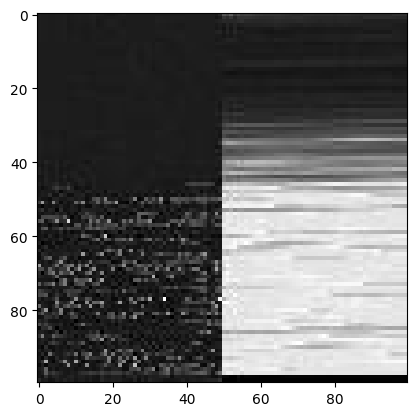

In [ ]:
# Using the above function to generate data with 50, 100 split ie. first 50 data points will in a row.
# Similar approach was used in the paper
images = image_2d((100,50))

# Printing the shape of final data for cross checking
print(images.shape)

# Plotting a sample image
plt.imshow(images[0], cmap='gray')
plt.show()

In [ ]:
# Now mapping the class labels to a dictionary
print(np.unique(y))

class_map = {0:'healthy',
             1:'generator',
             2:'pict angle',
             3:'both'}

[0. 1. 2. 3.]


In [ ]:
# Checking the class balance
np.unique(y, return_counts=True)

(array([0., 1., 2., 3.]), array([1000, 1000, 1000, 1000]))

In [ ]:
# Converting the data into tf.data.Dataset format
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Define the number of classes
num_classes = 4

# Convert the integer class labels to one-hot encoded categorical representation
y_categorical = tf.keras.utils.to_categorical(y, num_classes=num_classes)

# Split the data into training and testing sets
train_images, test_images, train_targets, test_targets = train_test_split(images, y_categorical, 
                                                                        test_size=0.2, random_state=42, stratify=y_categorical)

# Split the data into training and validation sets
train_images, val_images, train_targets, val_targets = train_test_split(train_images, train_targets, 
                                                                        test_size=0.2, random_state=42, stratify=train_targets)

# Create TensorFlow dataset from the training data
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_targets))

# Create TensorFlow dataset from the validation data
val_dataset = tf.data.Dataset.from_tensor_slices((val_images, val_targets))

# Create TensorFlow dataset from the testing data
test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_targets))

# Define batch size and shuffle buffer size for training dataset
batch_size = 8
shuffle_buffer_size = 1000

# Shuffle and batch the training dataset
train_dataset = train_dataset.shuffle(shuffle_buffer_size).batch(batch_size)

# Batch the validation dataset
val_dataset = val_dataset.batch(batch_size)

# Batch the testing dataset
test_dataset = test_dataset.batch(batch_size)

**Question 7**

In [ ]:
# Creating the model
def create_model():
    # Initialize a Sequential model
    model = tf.keras.Sequential()
    
    # Add a 2D convolutional layer's with 32 filters, a 3x3 kernel size, and 'same' padding
    model.add(tf.keras.layers.Conv2D(32, (3, 3), padding='same', input_shape=(100,100,1)))
    model.add(tf.keras.layers.Conv2D(32, (3, 3), padding='same'))
    
    # 20% dropout layer to prevent overfitting
    model.add(tf.keras.layers.Dropout(0.2))
    
    # 2D convolutional layer with 16 filters and a 3x3 kernel size
    model.add(tf.keras.layers.Conv2D(16, (3, 3), padding='same', activation='relu'))
    
    # ReLU activation layer
    model.add(tf.keras.layers.Activation('relu'))
    
    # 3x3 max pooling layer to reduce the spatial dimensions of the feature maps
    model.add(tf.keras.layers.MaxPooling2D((3, 3), padding='same'))
    
    # Flatten the feature maps into a 1D vector
    model.add(tf.keras.layers.Flatten())
    
    # fully connected hidden layer with 10 units and ReLU activation
    model.add(tf.keras.layers.Dense(100, activation='relu'))
    
    # output layer with 4 units and softmax activation for multiclass classification
    model.add(tf.keras.layers.Dense(4, activation='softmax'))
    
    return model

In [ ]:
q6_cnn_model = create_model()

# Compling the model\
q6_cnn_model.compile(optimizer=tf.keras.optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Define early stopping callback with a patience of 5 epochs
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

# Define model checkpoint callback to save the best model based on validation accuracy
model_checkpoint = tf.keras.callbacks.ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True)

# Define a list of callbacks to be used during training
callbacks_list = [early_stop, model_checkpoint]

# Checking the model
q6_cnn_model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 32)      320       
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 32)      9248      
                                                                 
 dropout (Dropout)           (None, 100, 100, 32)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 100, 100, 16)      4624      
                                                                 
 activation (Activation)     (None, 100, 100, 16)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 34, 34, 16)       0         
 )                                                               
                                                        

In [ ]:
# Training the model
history = q6_cnn_model.fit(train_dataset, epochs=20, validation_data=val_dataset, callbacks=callbacks_list)

Epoch 1/20
320/320 [==============================] - 15s 10ms/step - loss: 9.5543 - accuracy: 0.5414 - val_loss: 0.4627 - val_accuracy: 0.8078
Epoch 2/20
320/320 [==============================] - 3s 10ms/step - loss: 0.3168 - accuracy: 0.8648 - val_loss: 0.3574 - val_accuracy: 0.8766
Epoch 3/20
320/320 [==============================] - 3s 10ms/step - loss: 0.2783 - accuracy: 0.8742 - val_loss: 0.3079 - val_accuracy: 0.8797
Epoch 4/20
320/320 [==============================] - 3s 10ms/step - loss: 0.2501 - accuracy: 0.8852 - val_loss: 0.3018 - val_accuracy: 0.8938
Epoch 5/20
320/320 [==============================] - 4s 11ms/step - loss: 0.2485 - accuracy: 0.8887 - val_loss: 0.2965 - val_accuracy: 0.8891
Epoch 6/20
320/320 [==============================] - 3s 9ms/step - loss: 0.2417 - accuracy: 0.8875 - val_loss: 0.2711 - val_accuracy: 0.8828
Epoch 7/20
320/320 [==============================] - 3s 9ms/step - loss: 0.2420 - accuracy: 0.8918 - val_loss: 0.2980 - val_accuracy: 0.8719


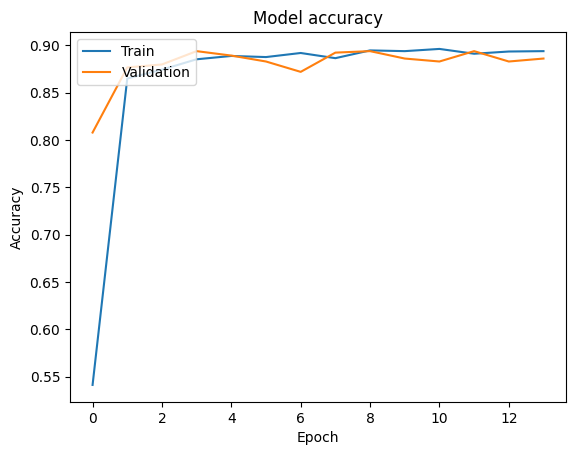

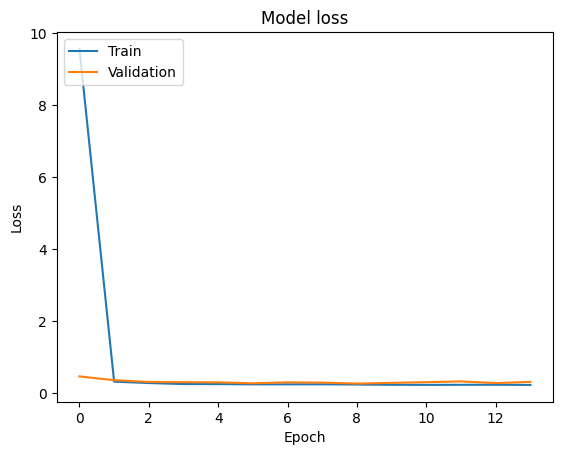

In [ ]:

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
def get_accuracy(model, dataset):
    # Initialize variables for calculating accuracy
    total_examples = 0
    correct_predictions = 0

    # Iterate over the dataset
    for x, y in dataset:
        # Use the model to make predictions
        y_pred = model.predict(x, verbose=0)
        # Calculate the number of correct predictions
        correct_predictions += tf.math.count_nonzero(tf.equal(tf.argmax(y, axis=1), tf.argmax(y_pred, axis=1)))
        # Update the total number of examples
        total_examples += x.shape[0]

    # Calculate the accuracy
    accuracy = correct_predictions / total_examples

    # Print the accuracy
    print(f"Accuracy: {accuracy:.4f}")
    
get_accuracy(q6_cnn_model, test_dataset)

Accuracy: 0.9012


Final Test Accuracy is 90.12%

**Question 8**

In [ ]:
# Creating the model
def create_model_q8():
    # Initialize a Sequential model
    model = tf.keras.Sequential()
    
    # Add a 2D convolutional layer's with 32 filters, a 3x3 kernel size, and 'same' padding
    model.add(tf.keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu',input_shape=(100,100,1)))
    
    model.add(tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
    
    model.add(tf.keras.layers.Dropout(0.3))
    
    model.add(tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
    model.add(tf.keras.layers.Conv2D(16, (3, 3), padding='same', activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D((3, 3)))
    
    # Flatten the feature maps into a 1D vector
    model.add(tf.keras.layers.Flatten())
    
    # fully connected hidden layer with 10 units and ReLU activation
    model.add(tf.keras.layers.Dense(100, activation='relu'))
    
    # output layer with 4 units and softmax activation for multiclass classification
    model.add(tf.keras.layers.Dense(4, activation='softmax'))
    
    return model

In [ ]:
q8_cnn_model = create_model_q8()

# Define the learning rate schedule
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,  # Initial learning rate
    decay_steps=1000,            # Number of steps between each decay
    decay_rate=0.96              # Decay rate
)

# Create an Adam optimizer with the learning rate schedule
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

# Compling the model
q8_cnn_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Define early stopping callback with a patience of 5 epochs
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

# Define model checkpoint callback to save the best model based on validation accuracy
model_checkpoint = tf.keras.callbacks.ModelCheckpoint('best_model_q8.h5', monitor='val_accuracy', save_best_only=True)

# Define a list of callbacks to be used during training
callbacks_list = [early_stop, model_checkpoint]

# Checking the model
q8_cnn_model.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 100, 100, 256)     2560      
                                                                 
 conv2d_4 (Conv2D)           (None, 100, 100, 64)      147520    
                                                                 
 dropout_1 (Dropout)         (None, 100, 100, 64)      0         
                                                                 
 conv2d_5 (Conv2D)           (None, 100, 100, 32)      18464     
                                                                 
 conv2d_6 (Conv2D)           (None, 100, 100, 16)      4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 33, 33, 16)       0         
 2D)                                                             
                                                      

In [ ]:
# Training the model
history = q8_cnn_model.fit(train_dataset, epochs=20, validation_data=val_dataset, callbacks=callbacks_list)

Epoch 1/20
320/320 [==============================] - 10s 30ms/step - loss: 0.2359 - accuracy: 0.8977 - val_loss: 0.2727 - val_accuracy: 0.8938
Epoch 2/20
320/320 [==============================] - 10s 30ms/step - loss: 0.2291 - accuracy: 0.8918 - val_loss: 0.2534 - val_accuracy: 0.8922
Epoch 3/20
320/320 [==============================] - 10s 30ms/step - loss: 0.2326 - accuracy: 0.8914 - val_loss: 0.2657 - val_accuracy: 0.8953
Epoch 4/20
320/320 [==============================] - 10s 30ms/step - loss: 0.2205 - accuracy: 0.8930 - val_loss: 0.3218 - val_accuracy: 0.8797
Epoch 5/20
320/320 [==============================] - 10s 31ms/step - loss: 0.2244 - accuracy: 0.8926 - val_loss: 0.2752 - val_accuracy: 0.8922
Epoch 6/20
320/320 [==============================] - 10s 30ms/step - loss: 0.2249 - accuracy: 0.8965 - val_loss: 0.2870 - val_accuracy: 0.8953
Epoch 7/20
320/320 [==============================] - 10s 30ms/step - loss: 0.2266 - accuracy: 0.8938 - val_loss: 0.2706 - val_accuracy:

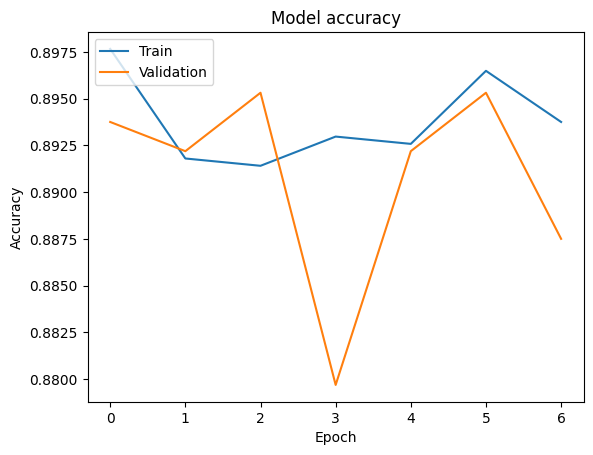

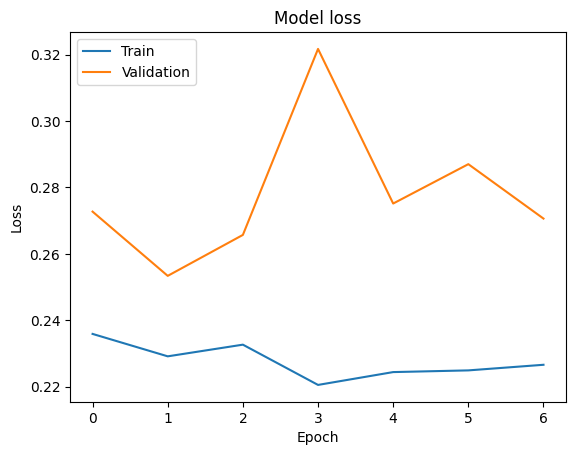

In [ ]:

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
get_accuracy(q8_cnn_model, test_dataset)

Accuracy: 0.9038


The final Test accuracy of the Modified Model is 90.38%

**Question 9**

- Comparing the accuracy for the test set in both the model the second model performs slightly better at 90.38% compared to 90.12%. Though this is not a huge increase in a real world scenario it might produce slightly bettter results.

- Choosing the second model is more beneficial because second model is also more complex than the first model so it capable to learning better and more intricate features and relations than the first model. This should help us in a production or real world scenario by helping us to keep the model stable in terms of the result it generates. 

- The complexity of the model also helps in the future if we want to train it using newlly collected data.

- The only disadvantage of the second model is that it requires more compute power to run because it has more parameters than the first model, so running this model may be slightly more expensive.

